In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#make plots inline 
%matplotlib inline

# model preprocessors
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LinearRegression

# evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("data/QUIZ DATASET.csv")

In [5]:
df

,Advertising Budget (in $1000s),Sales (in $1000s)
0,5,22
1,10,25
2,15,29
3,20,34
4,25,38
5,30,43
6,35,45
7,40,50
8,45,52
9,50,55


In [11]:
df.isna().sum()

Advertising Budget (in $1000s)    0
Sales (in $1000s)                 0
dtype: int64

In [17]:
df.dtypes


Advertising Budget (in $1000s)    int64
Sales (in $1000s)                 int64
dtype: object

Text(0.5, 1.0, '\tSales ')

D:\anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


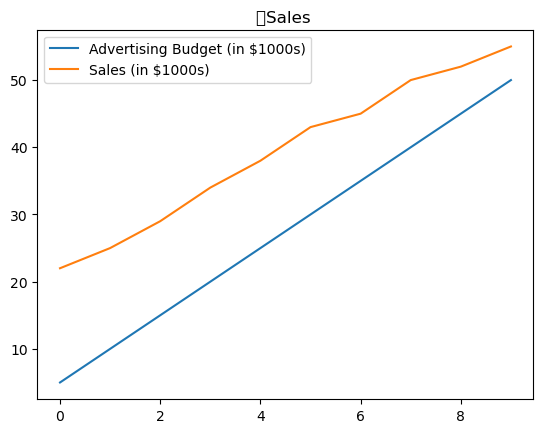

In [19]:
plt.plot(df)
plt.legend(df.columns)
plt.title("	Sales ")

In [21]:
corr = df.corr()
corr

,Advertising Budget (in $1000s),Sales (in $1000s)
Advertising Budget (in $1000s),1.00000,0.99619
Sales (in $1000s),0.99619,1.00000


In [30]:
x = df.drop("Sales (in $1000s)", axis=1)
y = df['Sales (in $1000s)']

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [34]:
rg = LinearRegression()

In [36]:
rg.fit(xtrain,ytrain)

LinearRegression()

In [38]:
rg.coef_

array([0.75562914])

In [40]:
rg.intercept_

18.400662251655632

In [42]:
xtest,ytest

(   Advertising Budget (in $1000s)
 5                              30
 2                              15,
 5    43
 2    29
 Name: Sales (in $1000s), dtype: int64)

In [44]:
ypred = rg.predict(xtest)

In [46]:
y

0    22
1    25
2    29
3    34
4    38
5    43
6    45
7    50
8    52
9    55
Name: Sales (in $1000s), dtype: int64

In [48]:
mse = mean_squared_error(ytest, ypred)
mse

2.1335303276172137

In [50]:
mae = mean_absolute_error(ytest, ypred)
mae

1.3327814569536436

In [52]:
rg.score(xtest, ytest)

0.9564585647425059

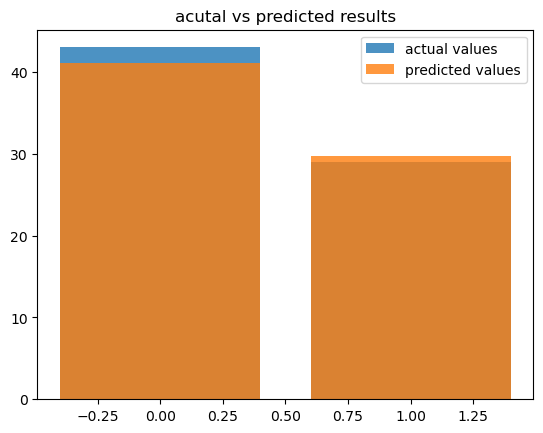

In [76]:
plt.bar(range(len(ytest)), ytest, alpha =0.8)
plt.bar(range(len(ypred)), ypred,  alpha =0.8)
plt.title("acutal vs predicted results")
plt.legend(["actual values","predicted values"])